## Chapter 3 Code - Python 3 version

### classifierPerformance_RocksVMines.py

Shape of xTrain array (138, 60)
Shape of yTrain array (138,)
Shape of xTest array (70, 60)
Shape of yTest array (70,)
Some values predicted by model [-0.10240253  0.42090698  0.38593034  0.36094537  0.31520494] [ 1.11094176  1.12242751  0.77626699  1.02016858  0.66338081]
tp = 68.0	fn = 6.0
fp = 7.0	tn = 57.0

tp = 28.0	fn = 9.0
fp = 9.0	tn = 24.0

AUC for in-sample ROC curve: 0.979519


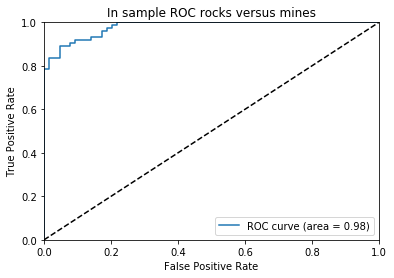

AUC for out-of-sample ROC curve: 0.848485


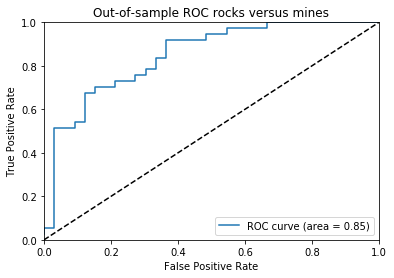

In [1]:
__author__ = 'mike-bowles'
#use scikit learn package to perform linear regression
#read in the rocks versus mines data set from uci.edu data repository
import urllib.request, urllib.error, urllib.parse
import numpy
import random
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as pl


def confusionMatrix(predicted, actual, threshold):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] > 0.5: #labels that are 1.0  (positive examples)
            if predicted[i] > threshold:
                tp += 1.0 #correctly predicted positive
            else:
                fn += 1.0 #incorrectly predicted negative
        else:              #labels that are 0.0 (negative examples)
            if predicted[i] < threshold:
                tn += 1.0 #correctly predicted negative
            else:
                fp += 1.0 #incorrectly predicted positive
    rtn = [tp, fn, fp, tn]
    return rtn


#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    #assign label 1.0 for "M" and 0.0 for "R"
    if(row[-1] == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)
    #remove label from row
    row.pop()
    #convert row to floats
    floatRow = [float(num) for num in row]
    xList.append(floatRow)

#divide attribute matrix and label vector into training(2/3 of data) and test sets (1/3 of data)
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#form list of list input into numpy arrays to match input class for scikit-learn linear model
xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

#check shapes to see what they look like
print("Shape of xTrain array", xTrain.shape)
print("Shape of yTrain array", yTrain.shape)
print("Shape of xTest array", xTest.shape)
print("Shape of yTest array", yTest.shape)

#train linear regression model
rocksVMinesModel = linear_model.LinearRegression()
rocksVMinesModel.fit(xTrain,yTrain)

#generate predictions on in-sample error
trainingPredictions = rocksVMinesModel.predict(xTrain)
print("Some values predicted by model", trainingPredictions[0:5], trainingPredictions[-6:-1])

#generate confusion matrix for predictions on training set (in-sample
confusionMatTrain = confusionMatrix(trainingPredictions, yTrain, 0.5)
#pick threshold value and generate confusion matrix entries
tp = confusionMatTrain[0]; fn = confusionMatTrain[1]; fp = confusionMatTrain[2]; tn = confusionMatTrain[3]

print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn) + '\n')

#generate predictions on out-of-sample data
testPredictions = rocksVMinesModel.predict(xTest)

#generate confusion matrix from predictions on out-of-sample data
conMatTest = confusionMatrix(testPredictions, yTest, 0.5)
#pick threshold value and generate confusion matrix entries
tp = conMatTest[0]; fn = conMatTest[1]; fp = conMatTest[2]; tn = conMatTest[3]
print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn) + '\n')

#generate ROC curve for in-sample

fpr, tpr, thresholds = roc_curve(yTrain,trainingPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for in-sample ROC curve: %f' % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

#generate ROC curve for out-of-sample
fpr, tpr, thresholds = roc_curve(yTest,testPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for out-of-sample ROC curve: %f' % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out-of-sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

### classifierRidgeRocksVMines.py

AUC             alpha
0.841113841114 999.9999999999999
0.864045864046 99.99999999999999
0.907452907453 10.0
0.9180999181 1.0
0.882882882883 0.1
0.861588861589 0.010000000000000002
0.851760851761 0.0010000000000000002
0.850941850942 0.00010000000000000002
0.849303849304 1.0000000000000003e-05


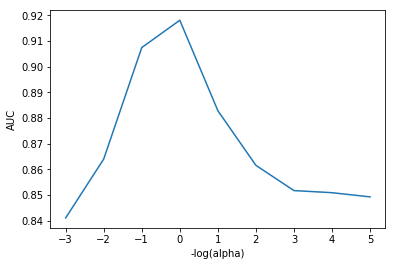

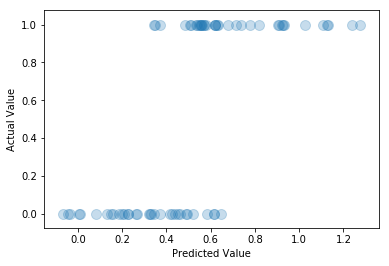

In [3]:
__author__ = 'mike-bowles'
import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as plt

#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().decode().split(",")
    #assign label 1.0 for "M" and 0.0 for "R"
    if(row[-1] == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)
        #remove lable from row
    row.pop()
    #convert row to floats
    floatRow = [float(num) for num in row]
    xList.append(floatRow)

#divide attribute matrix and label vector into training(2/3 of data) and test sets (1/3 of data)
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#form list of list input into numpy arrays to match input class for scikit-learn linear model
xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

alphaList = [0.1**i for i in [-3, -2, -1, 0,1, 2, 3, 4, 5]]

aucList = []
for alph in alphaList:
    rocksVMinesRidgeModel = linear_model.Ridge(alpha=alph)
    rocksVMinesRidgeModel.fit(xTrain, yTrain)
    fpr, tpr, thresholds = roc_curve(yTest,rocksVMinesRidgeModel.predict(xTest))
    roc_auc = auc(fpr, tpr)
    aucList.append(roc_auc)

    
print("AUC             alpha")
for i in range(len(aucList)):
    print(aucList[i], alphaList[i])

#plot auc values versus alpha values
x = [-3, -2, -1, 0,1, 2, 3, 4, 5]
plt.plot(x, aucList)
plt.xlabel('-log(alpha)')
plt.ylabel('AUC')
plt.show()

#visualize the performance of the best classifier
indexBest = aucList.index(max(aucList))
alph = alphaList[indexBest]
rocksVMinesRidgeModel = linear_model.Ridge(alpha=alph)
rocksVMinesRidgeModel.fit(xTrain, yTrain)

#scatter plot of actual vs predicted
plt.scatter(rocksVMinesRidgeModel.predict(xTest), yTest, s=100, alpha=0.25)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

### fwdStepwiseWine.py

Out of sample error versus attribute set size
[0.72342592551162777, 0.68609931528371959, 0.67343650334202776, 0.66770332138977961, 0.6622558568522271, 0.65900047541546247, 0.65727172061430761, 0.65709058062076997, 0.65699930964461373, 0.65758189400434741, 0.65739098690113373]

Best attribute indices
[10, 1, 9, 4, 6, 8, 5, 3, 2, 7, 0]

Best attribute names
['"alcohol"', '"volatile acidity"', '"sulphates"', '"chlorides"', '"total sulfur dioxide"', '"pH"', '"free sulfur dioxide"', '"residual sugar"', '"citric acid"', '"density"', '"fixed acidity"']


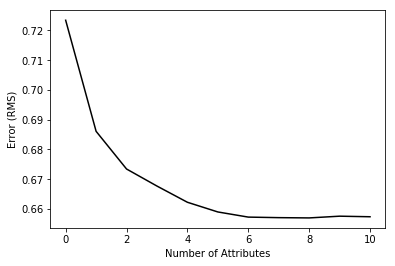

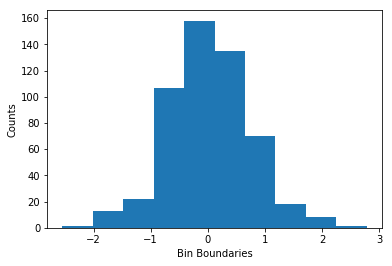

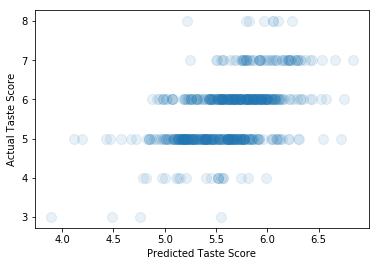

In [5]:
__author__ = 'mike-bowles'
import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt

def xattrSelect(x, idxSet):
    #takes X matrix as list of list and returns subset containing columns in idxSet
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)
xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.strip().decode().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().decode().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#divide attributes and labels into training and test sets
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#build list of attributes one-at-a-time - starting with empty
attributeList = []
index = range(len(xList[1]))
indexSet = set(index)
indexSeq = []
oosError = []

for i in index:
    attSet = set(attributeList)
    #attributes not in list already
    attTrySet = indexSet - attSet
    #form into list
    attTry = [ii for ii in attTrySet]
    errorList = []
    attTemp = []
    #try each attribute not in set to see which one gives least oos error
    for iTry in attTry:
        attTemp = [] + attributeList
        attTemp.append(iTry)
        #use attTemp to form training and testing sub matrices as list of lists
        xTrainTemp = xattrSelect(xListTrain, attTemp)
        xTestTemp = xattrSelect(xListTest, attTemp)
        #form into numpy arrays
        xTrain = numpy.array(xTrainTemp); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xTestTemp); yTest = numpy.array(labelsTest)
        #use sci-kit learn linear regression
        wineQModel = linear_model.LinearRegression()
        wineQModel.fit(xTrain,yTrain)
        #use trained model to generate prediction and calculate rmsError
        rmsError = numpy.linalg.norm((yTest-wineQModel.predict(xTest)), 2)/sqrt(len(yTest))
        errorList.append(rmsError)
        attTemp = []

    iBest = numpy.argmin(errorList)
    attributeList.append(attTry[iBest])
    oosError.append(errorList[iBest])

print("Out of sample error versus attribute set size" )
print(oosError)
print("\n" + "Best attribute indices")
print(attributeList)
namesList = [names[i] for i in attributeList]
print("\n" + "Best attribute names")
print(namesList)

#Plot error versus number of attributes
x = range(len(oosError))
plt.plot(x, oosError, 'k')
plt.xlabel('Number of Attributes')
plt.ylabel('Error (RMS)')
plt.show()

#Plot histogram of out of sample errors for best number of attributes
#Identify index corresponding to min value, retrain with the corresponding attributes
#Use resulting model to predict against out of sample data.  Plot errors (aka residuals)
indexBest = oosError.index(min(oosError))
attributesBest = attributeList[1:(indexBest+1)]

#Define column-wise subsets of xListTrain and xListTest and convert to numpy
xTrainTemp = xattrSelect(xListTrain, attributesBest)
xTestTemp = xattrSelect(xListTest, attributesBest)
xTrain = numpy.array(xTrainTemp); xTest = numpy.array(xTestTemp)

#train and plot error histogram
wineQModel = linear_model.LinearRegression()
wineQModel.fit(xTrain,yTrain)
errorVector = yTest-wineQModel.predict(xTest)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

#scatter plot of actual versus predicted
plt.scatter(wineQModel.predict(xTest), yTest, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()

### readURL.py

In [9]:
__author__ = 'mike-bowles'
import urllib.request, urllib.error, urllib.parse
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"


for line in urllib.request.urlopen(target_url):
    print(line.decode())

0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R

0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R

0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,

### regressionErrorMeasures.py

In [6]:
__author__ = 'mike-bowles'


#here are some made-up numbers to start with
target = [1.5, 2.1, 3.3, -4.7, -2.3, 0.75]
prediction = [0.5, 1.5, 2.1, -2.2, 0.1, -0.5]

error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])

#print the errors
print("Errors ",)
print(error)
#ans:  [1.0, 0.60000000000000009, 1.1999999999999997, -2.5, -2.3999999999999999, 1.25]



#calculate the squared errors and absolute value of errors
squaredError = []
absError = []
for val in error:
    squaredError.append(val*val)
    absError.append(abs(val))


#print squared errors and absolute value of errors
print("Squared Error")
print(squaredError)
#ans: [1.0, 0.3600000000000001, 1.4399999999999993, 6.25, 5.7599999999999998, 1.5625]
print("Absolute Value of Error")
print(absError)
#ans: [1.0, 0.60000000000000009, 1.1999999999999997, 2.5, 2.3999999999999999, 1.25]


#calculate and print mean squared error MSE
print("MSE = ", sum(squaredError)/len(squaredError))
#ans: 2.72875


from math import sqrt
#calculate and print square root of MSE (RMSE)
print("RMSE = ", sqrt(sum(squaredError)/len(squaredError)))
#ans: 1.65189285367


#calculate and print mean absolute error MAE
print("MAE = ", sum(absError)/len(absError))
#ans: 1.49166666667


#compare MSE to target variance
targetDeviation = []
targetMean = sum(target)/len(target)
for val in target:
    targetDeviation.append((val - targetMean)*(val - targetMean))

#print the target variance
print("Target Variance = ", sum(targetDeviation)/len(targetDeviation))
#ans: 7.5703472222222219

#print the the target standard deviation (square root of variance)
print("Target Standard Deviation = ", sqrt(sum(targetDeviation)/len(targetDeviation)))
#ans: 2.7514263977475797

Errors 
[1.0, 0.6000000000000001, 1.1999999999999997, -2.5, -2.4, 1.25]
Squared Error
[1.0, 0.3600000000000001, 1.4399999999999993, 6.25, 5.76, 1.5625]
Absolute Value of Error
[1.0, 0.6000000000000001, 1.1999999999999997, 2.5, 2.4, 1.25]
MSE =  2.72875
RMSE =  1.651892853668179
MAE =  1.4916666666666665
Target Variance =  7.570347222222222
Target Standard Deviation =  2.7514263977475797


### ridgeWine.py

RMS Error             alpha
0.659578817634 1.0
0.657861091881 0.1
0.657617214464 0.010000000000000002
0.657521648264 0.0010000000000000002
0.657419068011 0.00010000000000000002
0.657394162885 1.0000000000000003e-05
0.657391308716 1.0000000000000004e-06


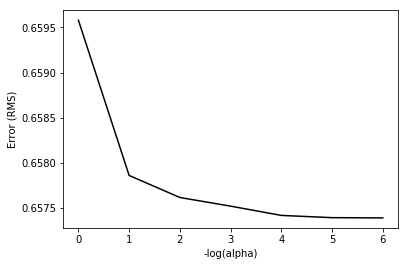

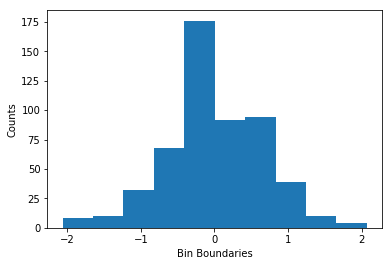

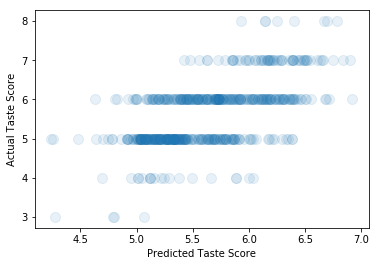

In [11]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.strip().decode().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().decode().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#divide attributes and labels into training and test sets
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

alphaList = [0.1**i for i in [0,1, 2, 3, 4, 5, 6]]

rmsError = []
for alph in alphaList:
    wineRidgeModel = linear_model.Ridge(alpha=alph)
    wineRidgeModel.fit(xTrain, yTrain)
    rmsError.append(numpy.linalg.norm((yTest-wineRidgeModel.predict(xTest)), 2)/sqrt(len(yTest)))

print("RMS Error             alpha")
for i in range(len(rmsError)):
    print(rmsError[i], alphaList[i])

#plot curve of out-of-sample error versus alpha
x = range(len(rmsError))
plt.plot(x, rmsError, 'k')
plt.xlabel('-log(alpha)')
plt.ylabel('Error (RMS)')
plt.show()

#Plot histogram of out of sample errors for best alpha value and scatter plot of actual versus predicted
#Identify index corresponding to min value, retrain with the corresponding value of alpha
#Use resulting model to predict against out of sample data.  Plot errors (aka residuals)
indexBest = rmsError.index(min(rmsError))
alph = alphaList[indexBest]
wineRidgeModel = linear_model.Ridge(alpha=alph)
wineRidgeModel.fit(xTrain, yTrain)
errorVector = yTest-wineRidgeModel.predict(xTest)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

plt.scatter(wineRidgeModel.predict(xTest), yTest, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()


### scatter_demo.py

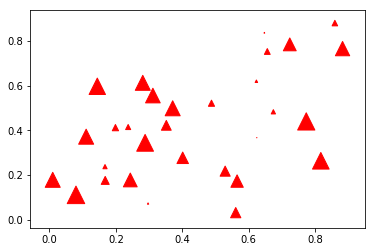

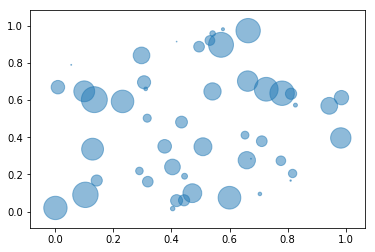

In [12]:
#!/usr/bin/env python
from pylab import *

N = 30
x = 0.9*rand(N)
y = 0.9*rand(N)
area = pi*(10 * rand(N))**2 # 0 to 10 point radiuses
scatter(x,y,s=area, marker='^', c='r')

show()

import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()